In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.drop(['Date'] , axis=1, inplace = True)

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [7]:
df.shape

(145460, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [9]:
df.columns = [col.lower() for col in df.columns]

In [10]:
df.describe()


,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [11]:
df.columns


Index(['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow', 'year', 'month', 'day'],
      dtype='object')

In [12]:
df['raintoday'].replace({'No':0,'Yes':1},inplace=True)
df['raintomorrow'].replace({'No':0,'Yes':1},inplace=True)
df.head(10)

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,2008,12,6
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,2008,12,7
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,2008,12,8
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,2008,12,9
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,2008,12,10


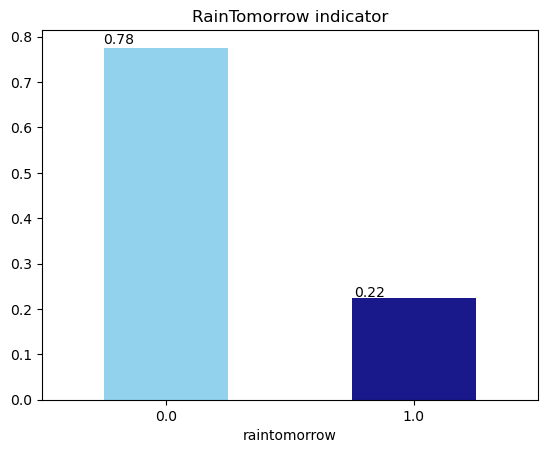

In [13]:
ax = df.raintomorrow.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.01,p.get_height()*1.01))
plt.title("RainTomorrow indicator")
plt.show()





In [14]:
from sklearn.utils import resample

no= df[df.raintomorrow==0]
yes= df[df.raintomorrow==1]

yes_oversampled= resample(yes,replace= True,n_samples=len(no),random_state=42)

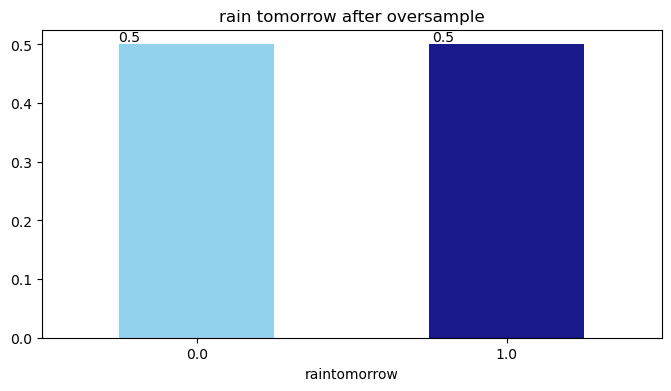

In [15]:
oversample=pd.concat([no,yes_oversampled])


fig = plt.figure(figsize=(8,4))
ax = oversample.raintomorrow.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)
plt.title('rain tomorrow after oversample')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.01,p.get_height()*1.01))
plt.show()


In [16]:
oversample.shape

(220632, 25)

In [17]:
oversample.isnull()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16538,False,True,False,False,True,True,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
45975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10302,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6773,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


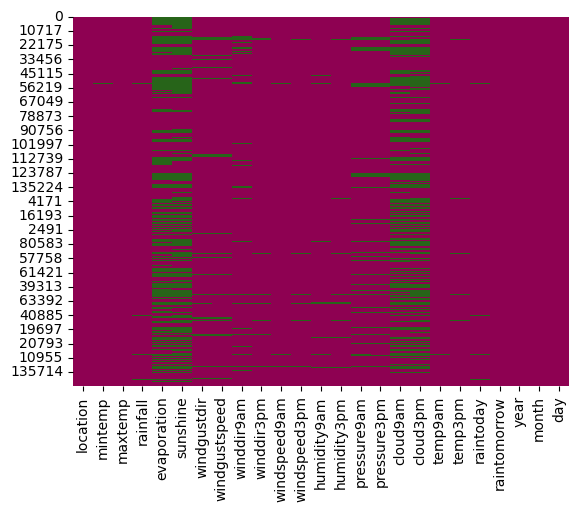

In [18]:
sns.heatmap(oversample.isnull(),cbar=False,cmap='PiYG')
plt.show()

In [19]:
# Check no of value missing
total = oversample.isnull().sum().sort_values(ascending = False)
percent = (oversample.isnull().sum()/oversample.isnull().count()).sort_values(ascending = False)

missing = pd.concat([total,percent],axis=1,keys=['Total','Percentage'])
print(missing)


                Total  Percentage
sunshine       104711    0.474596
evaporation     95325    0.432054
cloud3pm        85658    0.388239
cloud9am        81388    0.368886
pressure9am     21620    0.097991
pressure3pm     21619    0.097987
windgustdir     15338    0.069518
windgustspeed   15232    0.069038
winddir9am      14520    0.065811
winddir3pm       6309    0.028595
humidity3pm      6012    0.027249
temp3pm          4570    0.020713
windspeed3pm     4278    0.019390
humidity9am      3085    0.013983
rainfall         3026    0.013715
raintoday        3026    0.013715
windspeed9am     2162    0.009799
temp9am          1630    0.007388
mintemp          1090    0.004940
maxtemp           481    0.002180
year                0    0.000000
month               0    0.000000
location            0    0.000000
raintomorrow        0    0.000000
day                 0    0.000000


In [20]:
oversample.select_dtypes(include=['object']).columns #categorical values

Index(['location', 'windgustdir', 'winddir9am', 'winddir3pm'], dtype='object')

In [21]:
oversample['location'] = oversample['location'].fillna(oversample['location'].mode()[0])

oversample['windgustdir'] = oversample['windgustdir'].fillna(oversample['windgustdir'].mode()[0])

oversample['winddir9am'] = oversample['winddir9am'].fillna(oversample['winddir9am'].mode()[0])

oversample['winddir3pm'] = oversample['winddir3pm'].fillna(oversample['winddir3pm'].mode()[0])


In [22]:
from sklearn.preprocessing import LabelEncoder
lencoders ={}
for col in oversample.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversample[col] =lencoders[col].fit_transform(oversample[col])

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
miceimputed = oversample.copy(deep=True)
mice_imputer = IterativeImputer()
miceimputed.iloc[:,:] = mice_imputer.fit_transform(oversample)

In [24]:
Q1 = miceimputed.quantile(0.25)
Q3 = miceimputed.quantile(0.75)
IQR = Q3-Q1
print(IQR.sort_values(ascending=False))

humidity3pm      30.000000
humidity9am      26.000000
location         25.000000
windgustspeed    19.000000
day              15.000000
windspeed9am     13.000000
windspeed3pm     11.000000
maxtemp          10.200000
temp3pm           9.800000
temp9am           9.300000
mintemp           9.200000
windgustdir       9.000000
pressure3pm       8.863859
pressure9am       8.700000
winddir3pm        8.000000
winddir9am        8.000000
sunshine          5.961704
year              5.000000
month             5.000000
evaporation       4.117610
cloud9am          4.000000
cloud3pm          3.697490
rainfall          2.400000
raintoday         1.000000
raintomorrow      1.000000
dtype: float64


In [25]:
miceimputed = miceimputed[~((miceimputed<(Q1 - 1.5*IQR))|(miceimputed>(Q3+1.5*IQR))).any(axis=1)]
miceimputed.shape

(170401, 25)

In [26]:
corr = miceimputed.corr()

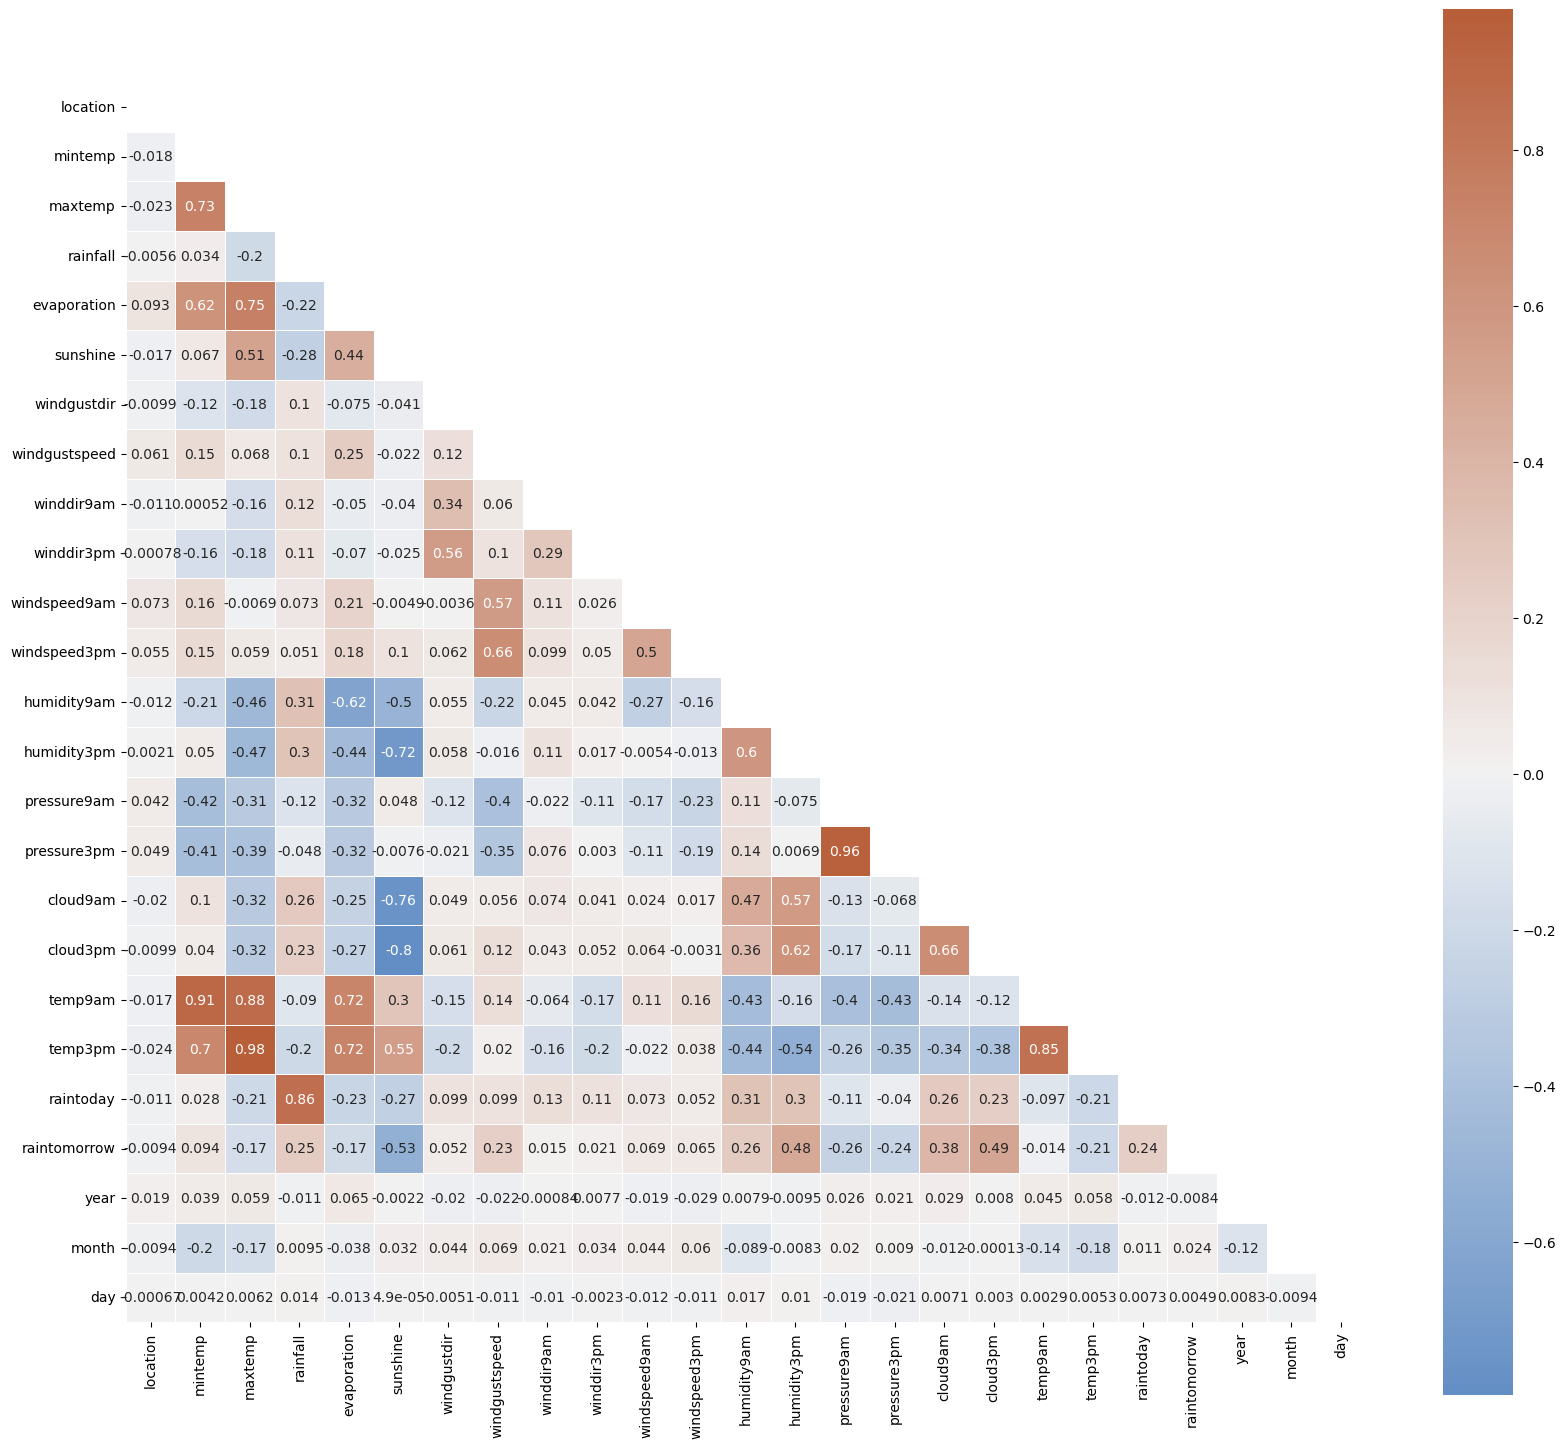

In [29]:
mask = np.triu(np.ones_like(corr,dtype=bool))

f,ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(250,25,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=None,center=0,square=True,annot=True,linewidths=.5,cbar_kws={"shrink":.9})

plt.show()

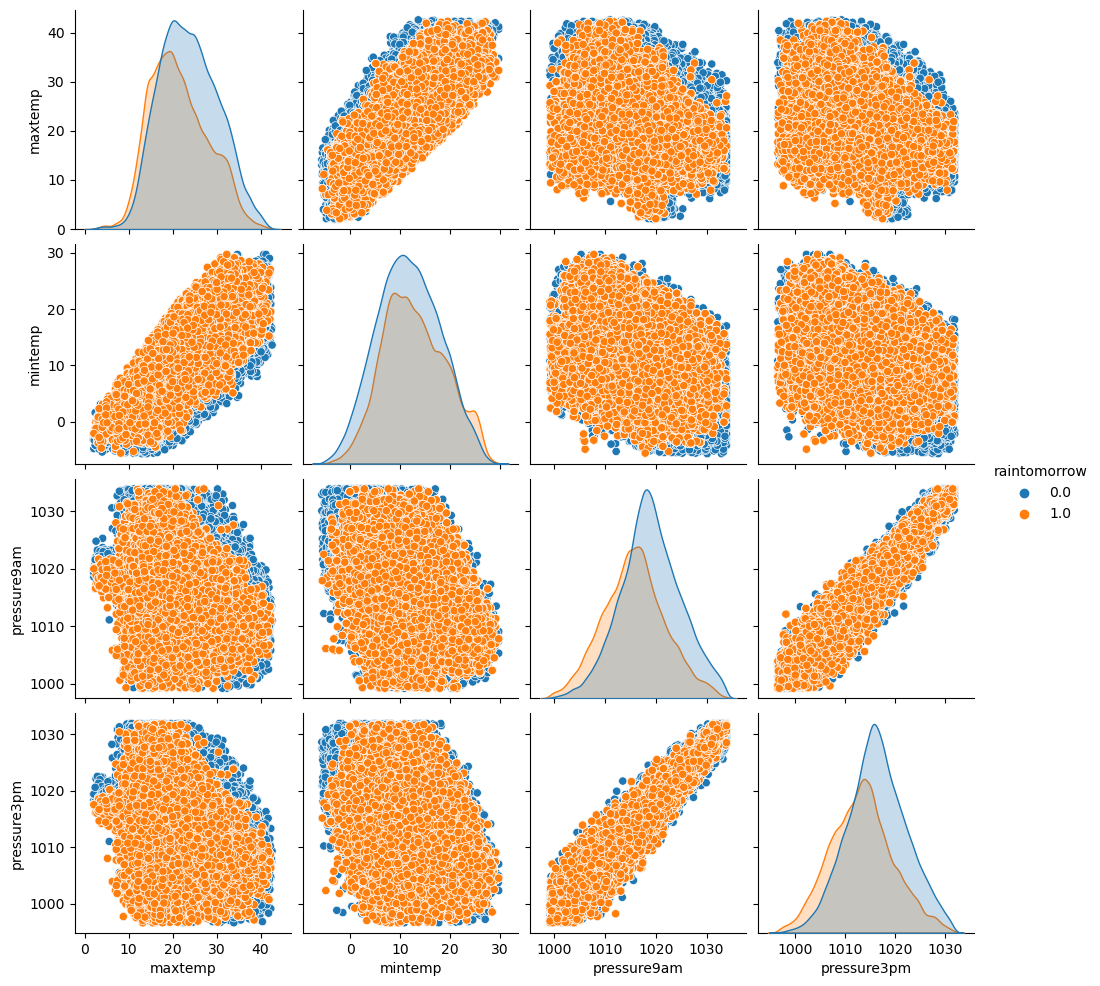

In [31]:
sns.pairplot(data=miceimputed,vars=('maxtemp','mintemp','pressure9am','pressure3pm'),hue='raintomorrow')
plt.show()

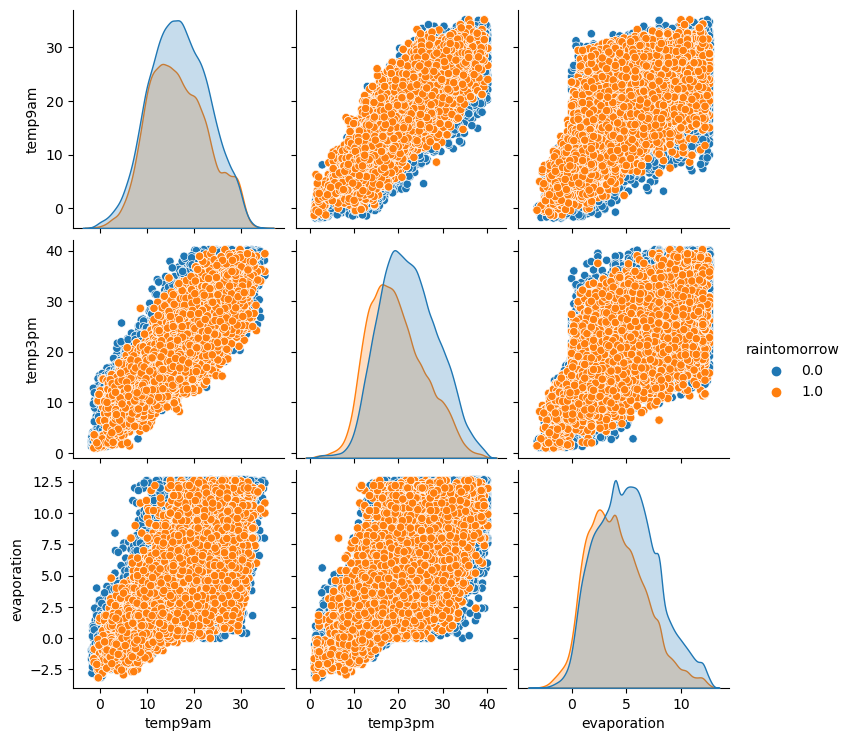

In [32]:
sns.pairplot(data=miceimputed,vars=('temp9am','temp3pm','evaporation',),hue='raintomorrow')
plt.show()

In [33]:
from sklearn import preprocessing

r_scale = preprocessing.MinMaxScaler()
r_scale.fit(miceimputed)
mod_data = pd.DataFrame(r_scale.transform(miceimputed),index=miceimputed.index,columns=miceimputed.columns)

In [34]:
mod_data


,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,0.041667,0.539548,0.514778,0.436342,0.583127,0.520422,0.866667,0.521127,0.866667,0.933333,...,0.297450,0.840321,0.417981,0.506775,0.530612,0.250376,0.0,0.1,1.000000,0.000000
1,0.041667,0.370056,0.568966,0.373713,0.576655,0.746115,0.933333,0.521127,0.400000,1.000000,...,0.317280,0.336764,0.228429,0.514905,0.594388,0.250376,0.0,0.1,1.000000,0.033333
2,0.041667,0.525424,0.583744,0.373713,0.708683,0.791991,1.000000,0.549296,0.866667,1.000000,...,0.342776,0.344607,0.175545,0.617886,0.566327,0.250376,0.0,0.1,1.000000,0.066667
3,0.041667,0.420904,0.640394,0.373713,0.596817,0.762638,0.266667,0.239437,0.600000,0.000000,...,0.458924,0.294370,0.184436,0.539295,0.650510,0.250376,0.0,0.1,1.000000,0.100000
4,0.041667,0.655367,0.746305,0.478094,0.666411,0.434267,0.866667,0.478873,0.066667,0.466667,...,0.266289,0.758019,0.702180,0.531165,0.732143,0.250376,0.0,0.1,1.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90843,0.291667,0.593220,0.495074,0.415466,0.501132,0.341258,0.666667,0.577465,0.666667,0.666667,...,0.895184,0.629775,0.587439,0.560976,0.428571,0.250376,1.0,0.3,0.545455,0.866667
120324,0.666667,0.361582,0.443350,1.000000,0.313426,0.567909,0.400000,0.478873,0.333333,0.400000,...,0.532578,0.346512,0.263317,0.349593,0.454082,1.000000,1.0,0.9,0.636364,0.500000
16816,0.500000,0.545198,0.738916,0.373713,0.596621,0.496303,0.866667,0.300230,0.266667,0.266667,...,0.403550,0.511115,0.526635,0.596206,0.778061,0.250376,1.0,0.6,1.000000,0.100000
23840,0.562500,0.522599,0.408867,0.373713,0.604261,0.438581,0.600000,0.366197,0.600000,0.133333,...,0.711048,0.675718,0.263317,0.509485,0.403061,0.250376,1.0,0.9,0.727273,0.333333


In [39]:
from sklearn.feature_selection import SelectKBest,chi2

x = mod_data.iloc[:,mod_data.columns!='raintomorrow']
y = mod_data[['raintomorrow']]

selector = SelectKBest(chi2,k=10)

selector.fit(x,y)

x_new = selector.transform(x)

print(x.columns[selector.get_support(indices=True)])

Index(['rainfall', 'sunshine', 'windgustspeed', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'raintoday'],
      dtype='object')


In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

x = miceimputed.drop('raintomorrow',axis=1)
y = miceimputed['raintomorrow']

selector = SelectFromModel(rf(n_estimators=100,random_state=0))

selector.fit(x,y)

support= selector.get_support()

feature = x.iloc[:,support].columns.tolist()

print(feature)

print(rf(n_estimators=100,random_state=0).fit(x,y).feature_importances_)

['sunshine', 'windgustspeed', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm']
[0.02718117 0.03214722 0.0319639  0.02801273 0.03223452 0.11267362
 0.01998611 0.0419042  0.02064722 0.0210322  0.02106017 0.02272426
 0.03112416 0.11860736 0.0472595  0.05856998 0.05659081 0.13926782
 0.03094184 0.03333469 0.0133717  0.01727235 0.01858183 0.02351064]


In [44]:
miceimputed.columns


Index(['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow', 'year', 'month', 'day'],
      dtype='object')

In [45]:
feature =miceimputed [['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday']]
target = miceimputed['raintomorrow']


In [46]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42,shuffle=True,stratify=target)

In [47]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [64]:
def plot_roc_cur(fper,tper):
    plt.plot(fper,tper,color = 'orange',label = 'ROC')
    
    plt.plot([0,1],[0,1],color='darkblue',linestyle = '--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Recriver Operating Characteristics(ROC)curve')
    
    plt.legend()
    
    plt.show()

In [65]:
import time 
from sklearn.metrics import accuracy_score,roc_auc_score,cohen_kappa_score,roc_curve,classification_report,confusion_matrix

def plot_confusion_matrix(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Prediction labels')
    plt.ylabel('True labels')
    plt.title('confusion matrix')
    plt.show()
    
def run_model(model,x_train,y_train,x_test,y_test,verbose = True):
    t0 = time.time()
    if verbose ==False:
        model.fit(x_train,y_train,verbose=0)
    else:
        model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    coh_score = cohen_kappa_score(y_test,y_pred)
    time_taken = time.time()-t0
    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under curve = {roc_auc}")
    print(f"cohen's kappa = {coh_score}")
    print(f"Time taken{time_taken}")
    print (classification_report(y_test,y_pred,digits=5))
    
    probs =model.predict_proba(x_test)
    probs = probs[:,1]
    fper,tper,thresholds =roc_curve(y_test,probs)
    plot_roc_cur(fper,tper)
    
    plot_confusion_matrix(y_test,y_pred)
    
    return model,accuracy,roc_auc,coh_score,time_taken


Accuracy = 0.7951057774126346
ROC Area under curve = 0.7890750819634537
cohen's kappa = 0.5815619353061565
Time taken3.2732884883880615
              precision    recall  f1-score   support

         0.0    0.80454   0.83849   0.82116     19120
         1.0    0.78183   0.73966   0.76016     14961

    accuracy                        0.79511     34081
   macro avg    0.79318   0.78908   0.79066     34081
weighted avg    0.79457   0.79511   0.79438     34081



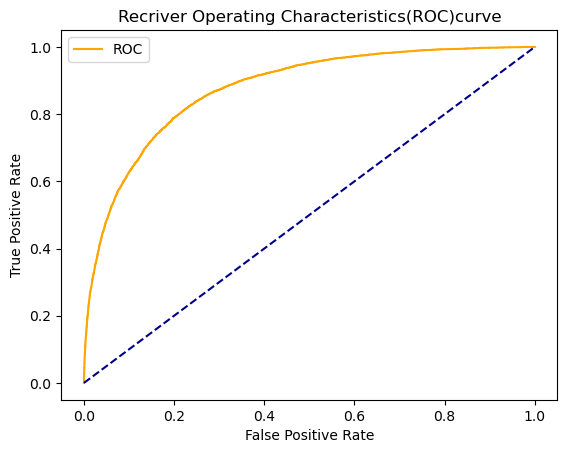

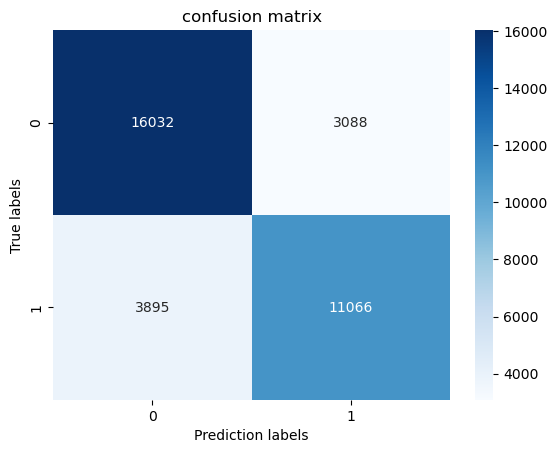

In [66]:
from sklearn.linear_model import LogisticRegression

# Define parameters for Logistic Regression
params_lr = {'penalty': 'l1', 'solver': 'liblinear'}

# Initialize the Logistic Regression model with the given parameters
model_lr = LogisticRegression(**params_lr)

# Run the model and get performance metrics
model_lr, accuracy_lr, roc_auc_lr, coh_score_lr, time_taken_lr = run_model(model_lr, x_train, y_train, x_test, y_test)


Accuracy = 0.869164637187876
ROC Area under curve = 0.8695457666921443
cohen's kappa = 0.7356208965775206
Time taken1.3904476165771484
              precision    recall  f1-score   support

         0.0    0.89687   0.86642   0.88138     19120
         1.0    0.83639   0.87267   0.85414     14961

    accuracy                        0.86916     34081
   macro avg    0.86663   0.86955   0.86776     34081
weighted avg    0.87032   0.86916   0.86942     34081



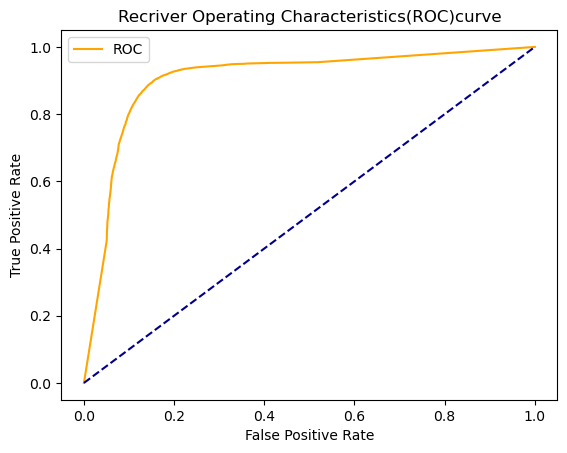

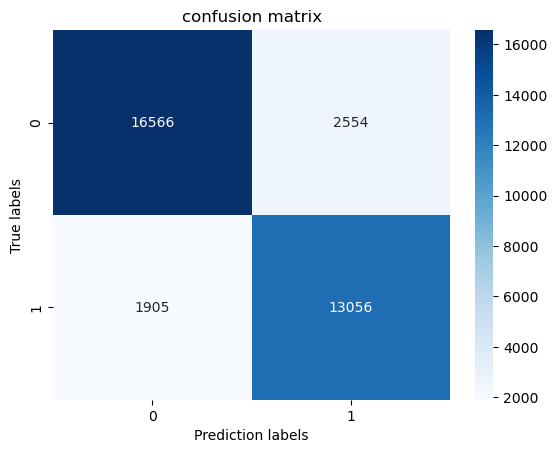

In [68]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth':16,'max_features':"sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)

model_dt, accuracy_dt, roc_auc_dt, coh_score_dt, time_taken_dt = run_model(model_dt, x_train, y_train, x_test, y_test)

Accuracy = 0.8846277984800915
ROC Area under curve = 0.882963667529999
cohen's kappa = 0.7658048589984786
Time taken416.958065032959
              precision    recall  f1-score   support

         0.0    0.89763   0.89660   0.89712     19120
         1.0    0.86805   0.86933   0.86869     14961

    accuracy                        0.88463     34081
   macro avg    0.88284   0.88296   0.88290     34081
weighted avg    0.88465   0.88463   0.88464     34081



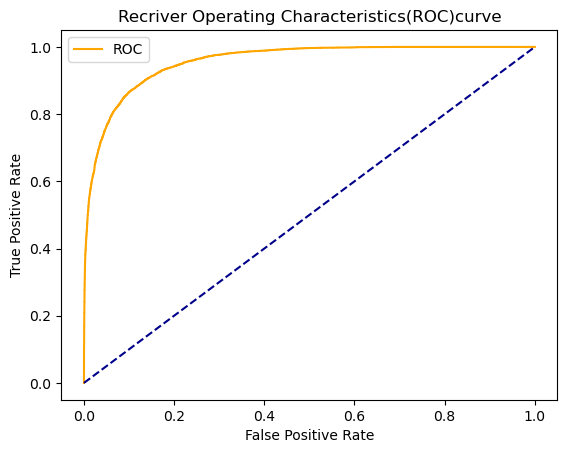

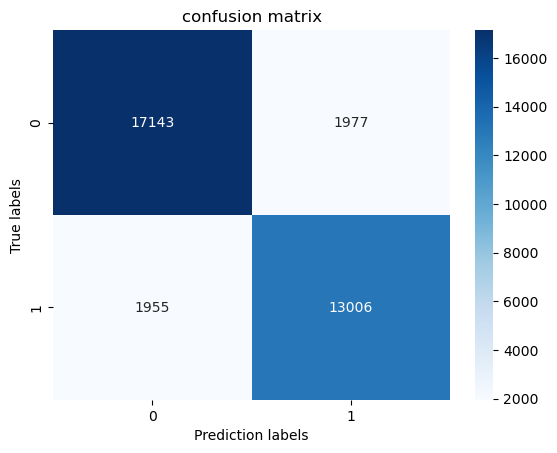

In [71]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes':(30,30,30),'activation':"logistic",'solver':"lbfgs",'max_iter':500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_score_nn, time_taken_nn = run_model(model_nn, x_train, y_train, x_test, y_test)

Accuracy = 0.9290807194624571
ROC Area under curve = 0.9304475737335482
cohen's kappa = 0.8567161712585682
Time taken108.16405940055847
              precision    recall  f1-score   support

         0.0    0.95268   0.91925   0.93567     19120
         1.0    0.90123   0.94165   0.92099     14961

    accuracy                        0.92908     34081
   macro avg    0.92695   0.93045   0.92833     34081
weighted avg    0.93009   0.92908   0.92923     34081



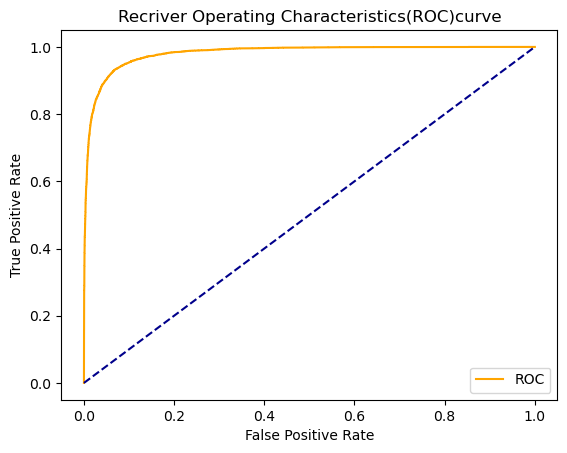

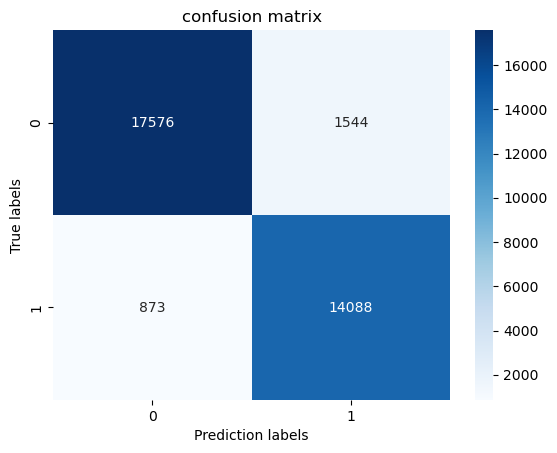

In [76]:
from sklearn.ensemble import RandomForestClassifier

parms_rf = {'max_depth':16,'min_samples_leaf':1,'min_samples_split':2,'n_estimators':100,'random_state':42}

model_rf = RandomForestClassifier(**parms_rf)

model_rf, accuracy_rf, roc_auc_rf, coh_score_rf, time_taken_rf = run_model(model_rf, x_train, y_train, x_test, y_test)

In [78]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 279.3 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 525.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 561.1 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 692.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 842.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 846.5 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 958.5 kB/s eta 0:00:02
   ------------ ------------------------

[LightGBM] [Warning] Unknown parameter: min_split_gains
[LightGBM] [Warning] Unknown parameter: min_split_gains
[LightGBM] [Info] Number of positive: 59844, number of negative: 76476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4317
[LightGBM] [Info] Number of data points in the train set: 136320, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438996 -> initscore=-0.245236
[LightGBM] [Info] Start training from score -0.245236
[LightGBM] [Warning] Unknown parameter: min_split_gains
Accuracy = 0.8707490977377425
ROC Area under curve = 0.871212336524056
cohen's kappa = 0.7388528493725259
Time taken9.748618841171265
              precision    recall  f1-score   support

         0.0    0.89867   0.86742   0.88277     19120
         1.0    0.83777   0.87

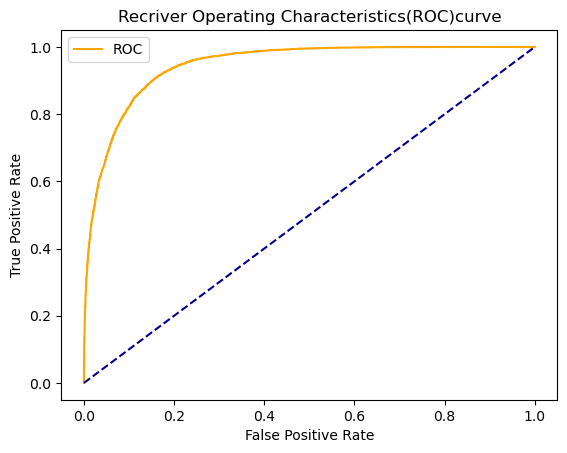

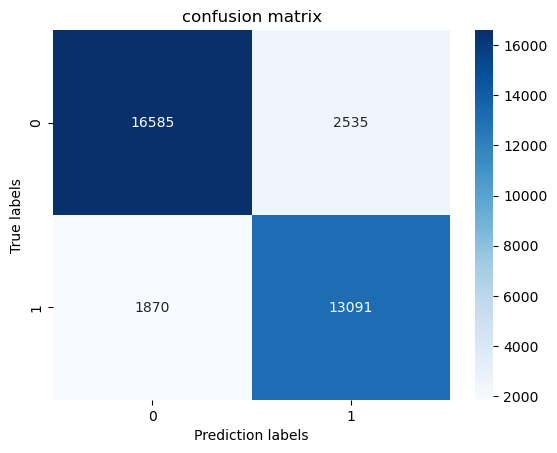

In [79]:
import lightgbm as lgb

params_lgb={'colsample_bytree':0.95,'max_depth':16,'min_split_gains':0.1,'num_leaves':50,'n_estimators':200,'reg_alpha':1.2,
           'reg_lambda':1.2,'subsample':0.95,'subsample_freq':200}

model_lgb = lgb.LGBMClassifier(**params_lgb)

model_lgb, accuracy_lgb, roc_auc_lgb, coh_score_lgb, time_taken_lgb = run_model(model_lgb, x_train, y_train, x_test, y_test)


In [80]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 262.6 kB/s eta 0:06:26
   ---------------------------------------- 0.0/101.1 MB 279.3 kB/s eta 0:06:02
   ---------------------------------------- 0.1/101.1 MB 357.2 kB/s eta 0:04:43
   ---------------------------------------- 0.1/101.1 MB 554.9 kB/s eta 0:03:03
   ---------------------------------------- 0.2/101.1 MB 654.4 kB/s eta 0:02:35
   ---------------------------------------- 0.2/101.1 MB 687.0 kB/s eta 0:02:27
   ---------------------------------------- 0.3/101.1 MB 711.1 kB/s eta 0:02:22
   --------------

Learning rate set to 0.5
0:	learn: 0.4542072	total: 9.15s	remaining: 7m 28s
1:	learn: 0.3656916	total: 18.1s	remaining: 7m 14s
2:	learn: 0.3330681	total: 27.2s	remaining: 7m 6s
3:	learn: 0.3031358	total: 36.2s	remaining: 6m 56s
4:	learn: 0.2684807	total: 45.5s	remaining: 6m 49s
5:	learn: 0.2518365	total: 54.3s	remaining: 6m 38s
6:	learn: 0.2221277	total: 1m 3s	remaining: 6m 28s
7:	learn: 0.2065817	total: 1m 12s	remaining: 6m 19s
8:	learn: 0.1878125	total: 1m 21s	remaining: 6m 10s
9:	learn: 0.1734286	total: 1m 30s	remaining: 6m
10:	learn: 0.1631829	total: 1m 39s	remaining: 5m 51s
11:	learn: 0.1496633	total: 1m 48s	remaining: 5m 42s
12:	learn: 0.1385222	total: 1m 56s	remaining: 5m 32s
13:	learn: 0.1236810	total: 2m 5s	remaining: 5m 23s
14:	learn: 0.1175579	total: 2m 14s	remaining: 5m 14s
15:	learn: 0.1093737	total: 2m 23s	remaining: 5m 4s
16:	learn: 0.1026605	total: 2m 32s	remaining: 4m 55s
17:	learn: 0.0955328	total: 2m 40s	remaining: 4m 46s
18:	learn: 0.0872576	total: 2m 49s	remaining:

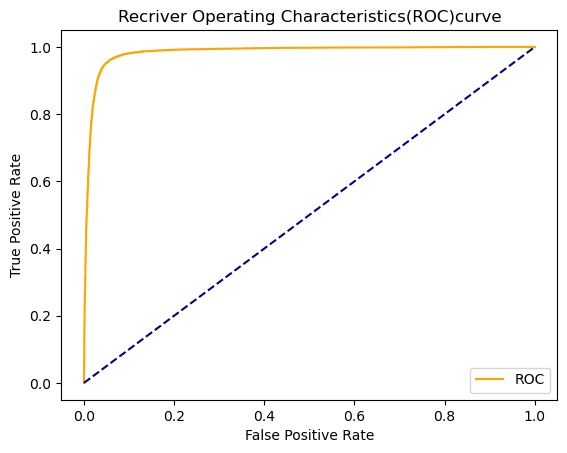

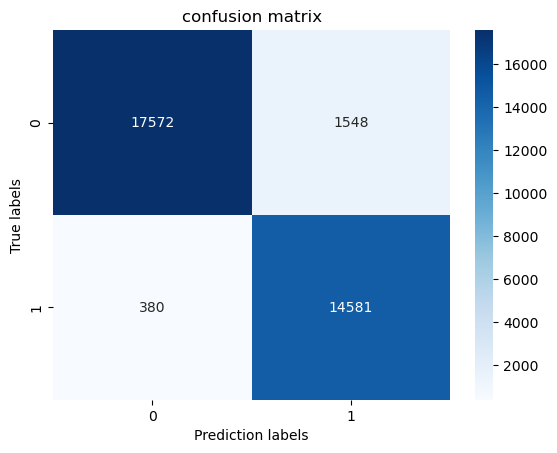

In [82]:
import catboost as cb

param_cb = {'iterations': 50,'max_depth':16}

model_cb = cb.CatBoostClassifier(**param_cb)

model_cb, accuracy_cb, roc_auc_cb, coh_score_cb, time_taken_cb = run_model(model_cb, x_train, y_train, x_test, y_test)

Accuracy = 0.9382060385552067
ROC Area under curve = 0.9401797305490789
cohen's kappa = 0.8752691768382033
Time taken30.484386920928955
              precision    recall  f1-score   support

         0.0    0.96436   0.92401   0.94375     19120
         1.0    0.90781   0.95635   0.93145     14961

    accuracy                        0.93821     34081
   macro avg    0.93608   0.94018   0.93760     34081
weighted avg    0.93953   0.93821   0.93835     34081



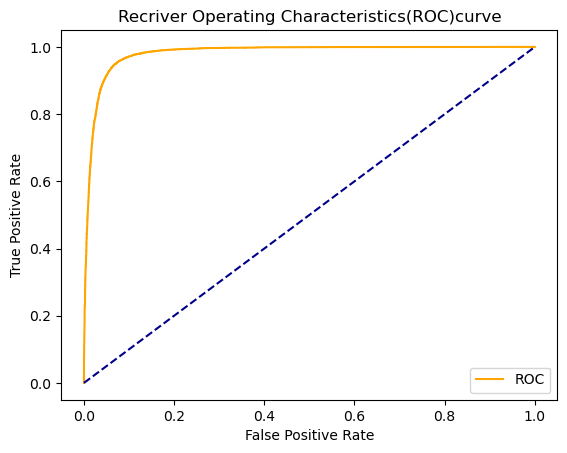

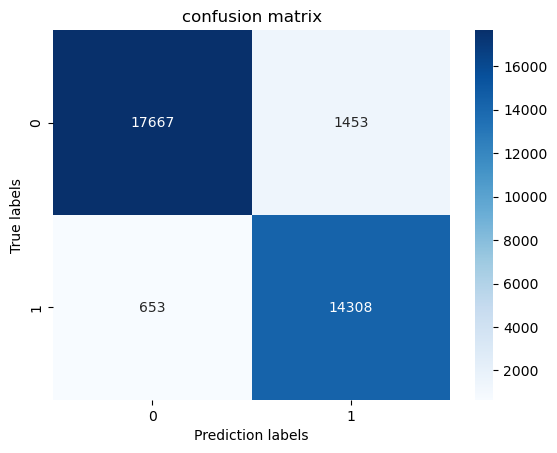

In [83]:
import xgboost as xgb

param_xgb = {'n_estimators':500,'max_depth':16}

model_xgb=xgb.XGBClassifier(**param_xgb)

model_xgb, accuracy_xgb, roc_auc_xgb, coh_score_xgb, time_taken_xgb = run_model(model_xgb, x_train, y_train, x_test, y_test)

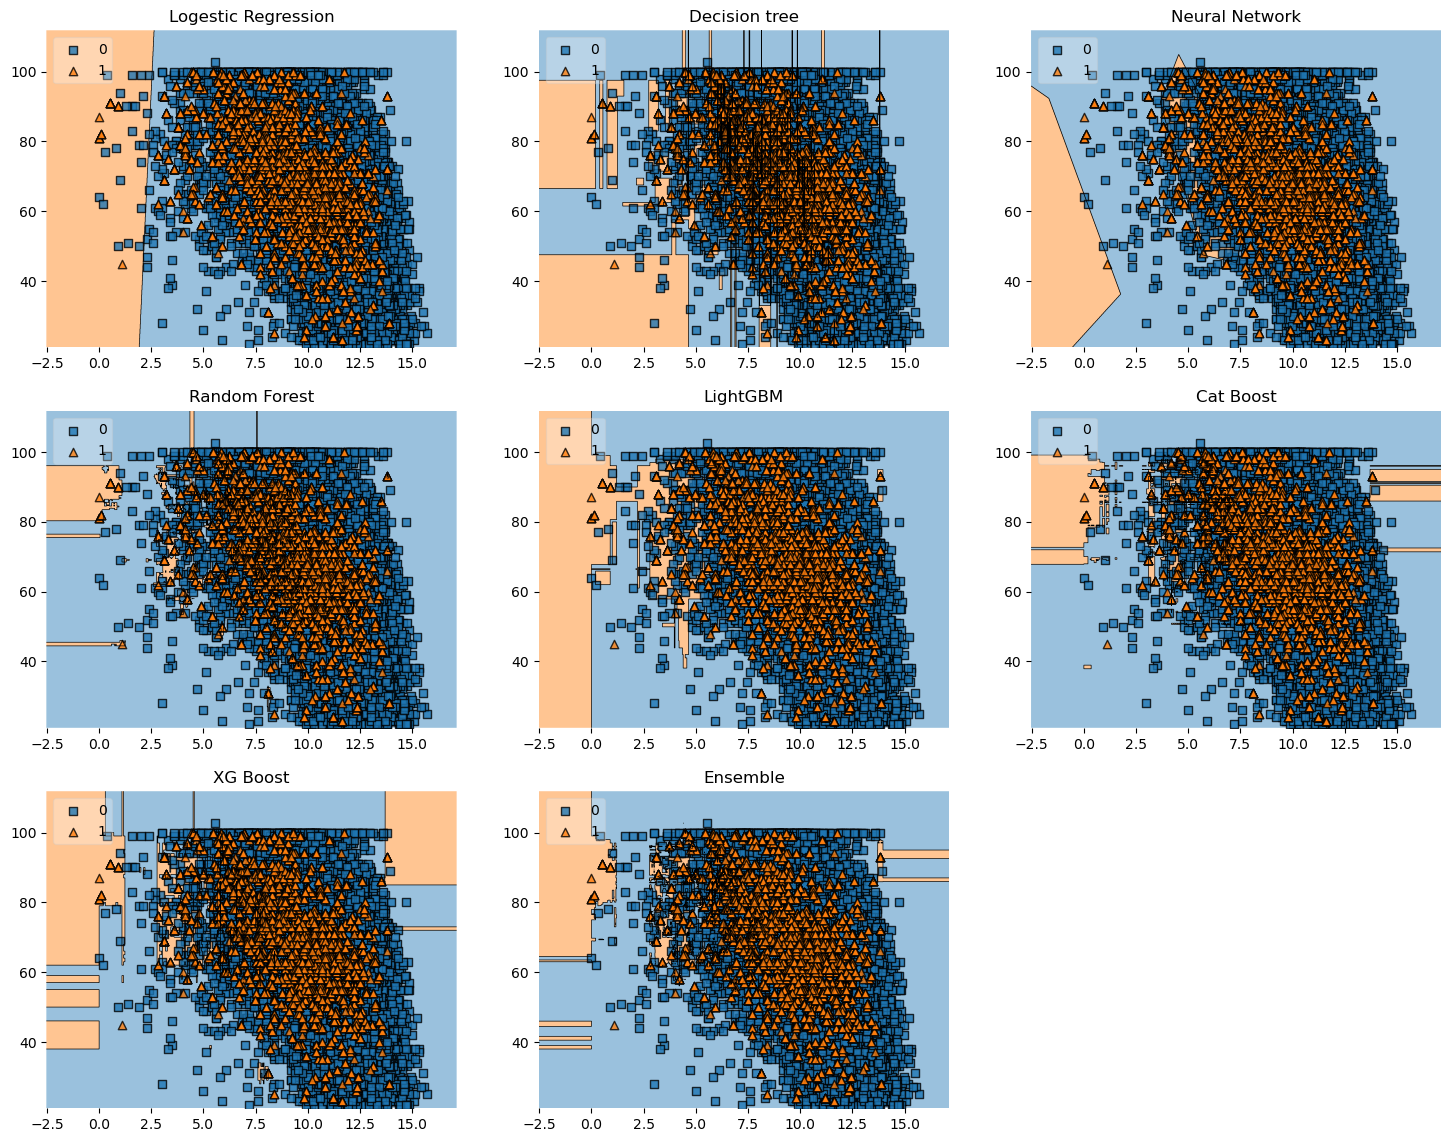

In [90]:
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = MLPClassifier(random_state= 42,verbose=0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42,verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42,verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs = [clf4,clf5,clf6,clf7],weights=[1,1,1,1],voting='soft')

x_list = miceimputed[['sunshine','humidity9am','cloud3pm']]
x = np.asarray(x_list,dtype=np.float32)

y_list = miceimputed['raintomorrow']
y= np.asarray(y_list,dtype=np.int32)

gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18,14))

labels = ['Logestic Regression',
         'Decision tree',
         'Neural Network',
         'Random Forest',
         'LightGBM',
         'Cat Boost',
         'XG Boost',
         'Ensemble']

for clf,lab,grd in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,eclf],labels,itertools.product([0,1,2],repeat=2)):
    clf.fit(x,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=x,y=y,clf=clf,filler_feature_values={2:value},filler_feature_ranges={2:width},legend=2)
    plt.title(lab)
    
plt.show()



In [100]:
accuracy_scores = [accuracy_lr,accuracy_dt,accuracy_nn,accuracy_rf,accuracy_lgb,accuracy_cb,accuracy_xgb]
roc_auc_scores  = [roc_auc_lr,roc_auc_dt,roc_auc_nn,roc_auc_rf,roc_auc_lgb,roc_auc_cb,roc_auc_xgb]
coh_kap_scores = [coh_score_lr,coh_score_dt,coh_score_nn,coh_score_rf,coh_score_lgb,coh_score_cb,coh_score_xgb]
tt = [time_taken_lr,time_taken_dt,time_taken_nn,time_taken_rf,time_taken_lgb,time_taken_cb,time_taken_xgb]

model_data ={'model':['Logestic Regression','Decision tree','Neural Network','Random Forest','LightGBM','Cat Boost','XG Boost'],
            'Accuracy':accuracy_scores,
            'ROC_AUC':roc_auc_scores,
            'Cohens Kappa':coh_kap_scores,
            'Time taken':tt}

data = pd.DataFrame(model_data)
        

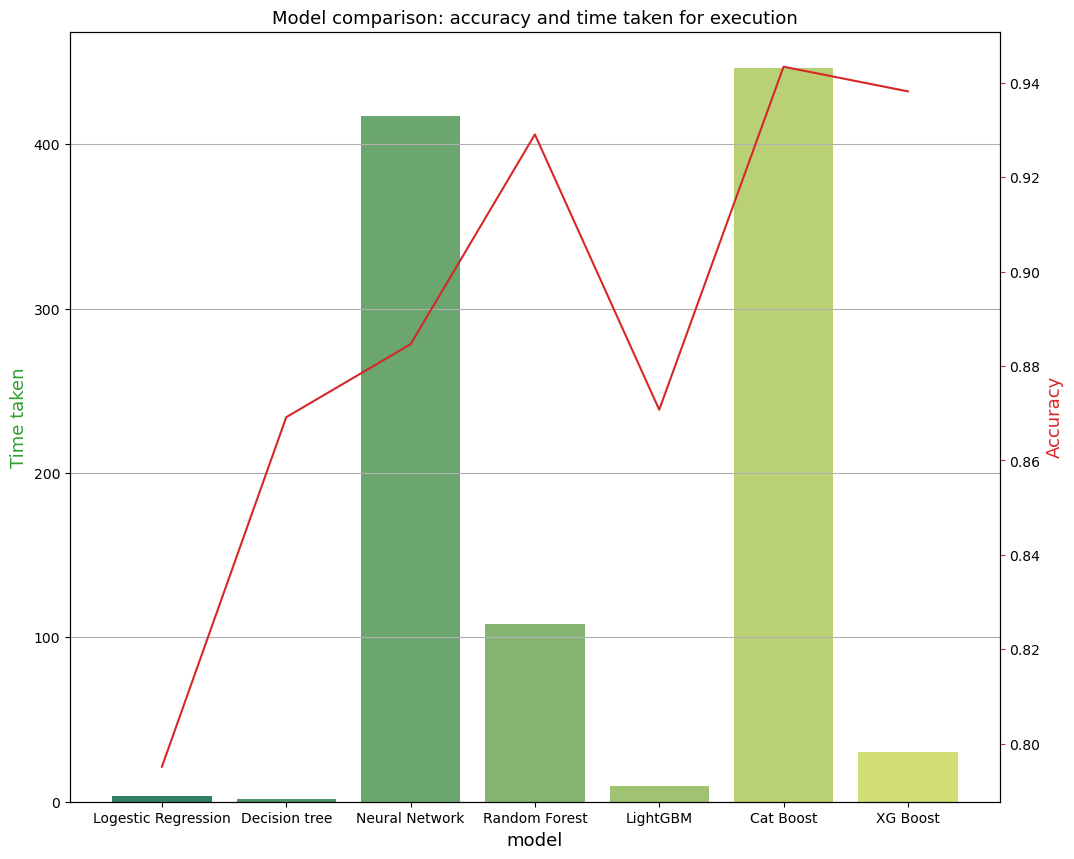

In [103]:
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model comparison: accuracy and time taken for execution',fontsize = 13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('model',fontsize=13)
ax1.set_ylabel('Time taken',fontsize=13,color=color)
ax2 = sns.barplot(x='model',y='Time taken',data=data,palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy',fontsize=13,color=color)
ax2 = sns.lineplot(x='model',y='Accuracy',data=data,sort=False,color=color)
ax2.tick_params(axis='y',color=color)

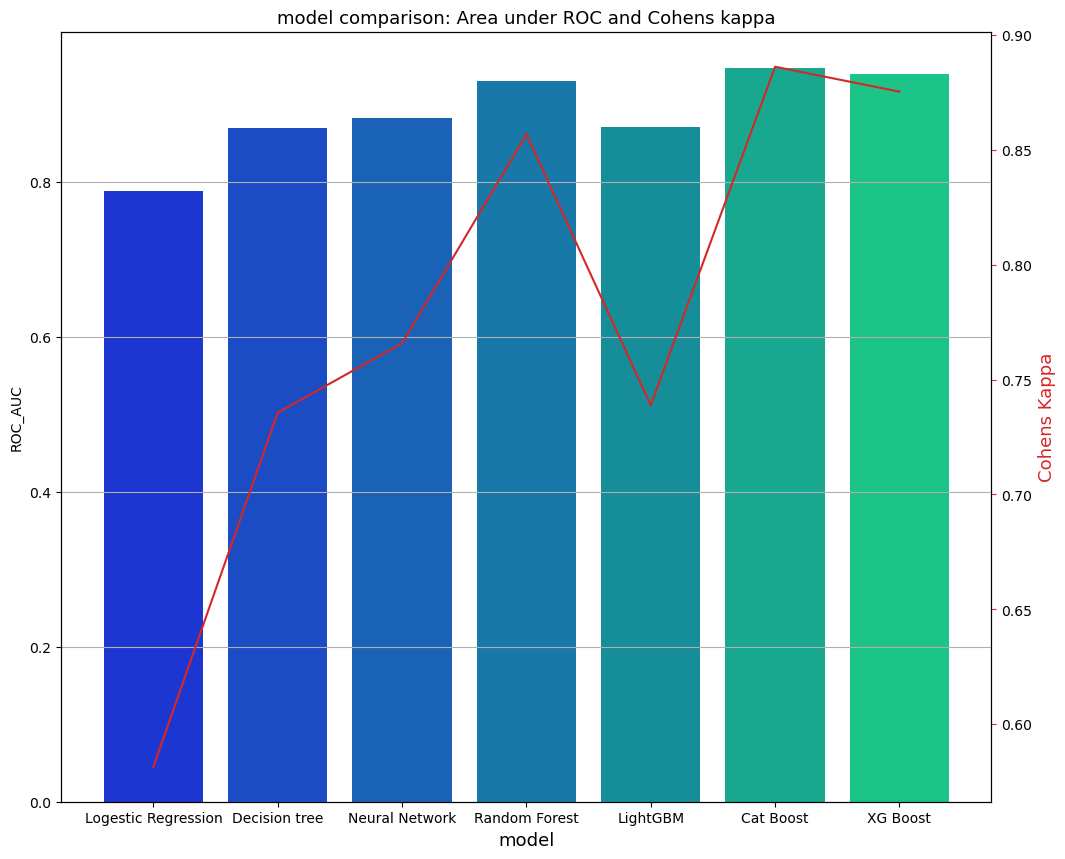

In [104]:
fig, ax3=plt.subplots(figsize=(12,10))
ax3.set_title('model comparison: Area under ROC and Cohens kappa',fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('model',fontsize=13)
ax1.set_ylabel('ROC_AUC',fontsize=13,color=color)
ax4 = sns.barplot(x='model',y='ROC_AUC',data=data,palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohens Kappa',fontsize=13,color=color)
ax2 = sns.lineplot(x='model',y='Cohens Kappa',data=data,sort=False,color=color)
ax2.tick_params(axis='y',color=color)
